## Investigating Guest Stars In The Office:

##### In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: datasets/office_episodes.csv, which was downloaded from Kaggle .

##### This dataset contains information on a variety of characteristics of each episode. In detail, these are:

##### datasets/office_episodes.csv

 <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>Unnamed:</b>integers starting from 0 </li>
    <li><b>Season:</b> Season in which the episode appeared.</li>
    <li><b>EpisodeTitle:</b> Title of the episode.</li>
    <li><b>About:</b> Description of the episode.</li>
    <li><b>Ratings:</b> Average IMDB rating.</li>
    <li><b>Votes:</b> Number of votes.</li>
    <li><b>Viewership:</b> Number of US viewers in millions.</li>
    <li><b>Duration:</b> Duration in number of minutes.</li>
    <li><b>Date:</b> Airdate.</li>
    <li><b>GuestStars:</b> Guest stars in the episode (if any).</li>
    <li><b>Director:</b> Director of the episode.</li>
    <li><b>Writers:</b> Writers of the episode.</li>
    <li><b>HasGuest:</b> True/False column for whether the episode contained guest stars.</li>
    
</ul>
    </div>

### Importing libraries and reading the .csv file:

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!  
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]
office_df=pd.read_csv("C:\\Users\\DELL\\Desktop\\the_office_series.csv")



### Adding a new column that contains boolean values and inspecting the dataframe:

In [2]:
office_df['HasGuest'] = office_df['GuestStars'].notna()
office_df.info()
office_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
 12  HasGuest      188 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 17.9+ KB


,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,HasGuest
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,False


#### Grouping the 'Season' column and taking the averages of 'Ratings' and 'Viewership' for respective seasons:

In [3]:
rate_view = office_df.groupby('Season')[['Ratings','Viewership']].mean().reset_index()


### plotting Ratings over Seasons:

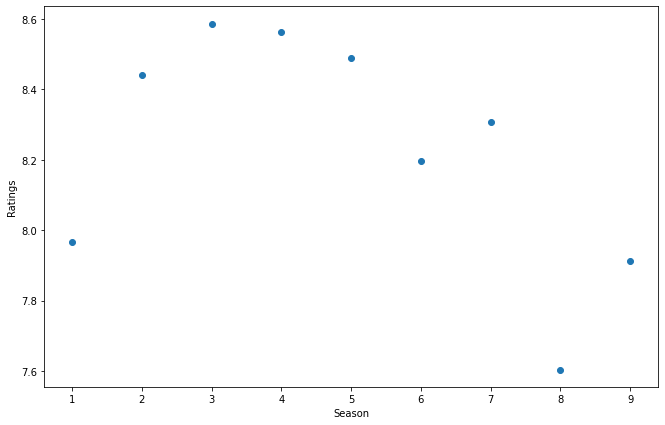

In [4]:
x = rate_view['Season']
y= rate_view['Ratings']

plt.scatter(x,y)
plt.style.use('fivethirtyeight')
plt.xlabel('Season')
plt.ylabel('Ratings')

plt.show()


### plotting seasons over viewership:

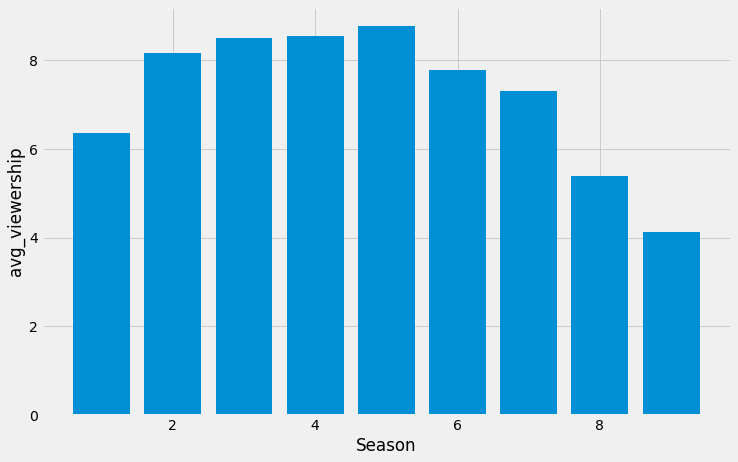

In [5]:
plt.bar(x,rate_view['Viewership'])
plt.style.use('fivethirtyeight')
plt.xlabel('Season')
plt.ylabel('avg_viewership')
plt.show()

#### grouping Season column by GuestStars column and counting the no of Guest stars for each season:

In [6]:
totalguest = office_df.groupby('Season')[['GuestStars']].count().reset_index()


### Bar graph showing no of Guest stars in each of the seasons:

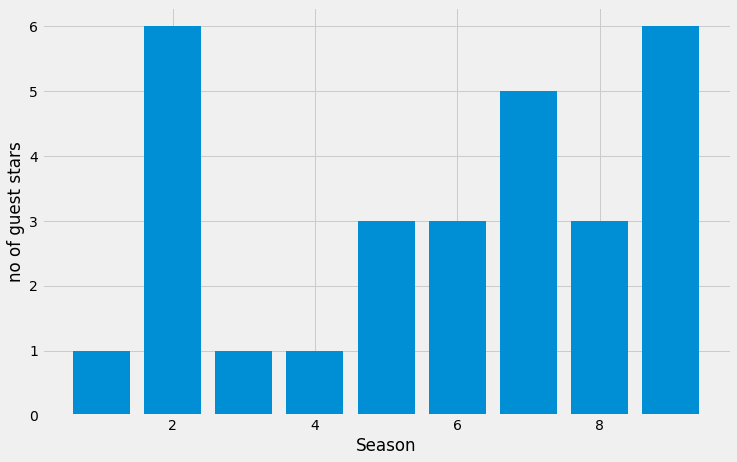

In [7]:
a= totalguest['Season']
b= totalguest['GuestStars']

plt.bar(a,b)
plt.xlabel('Season')
plt.ylabel('no of guest stars')
plt.show()


### Bar graph showing no of episodes per season:


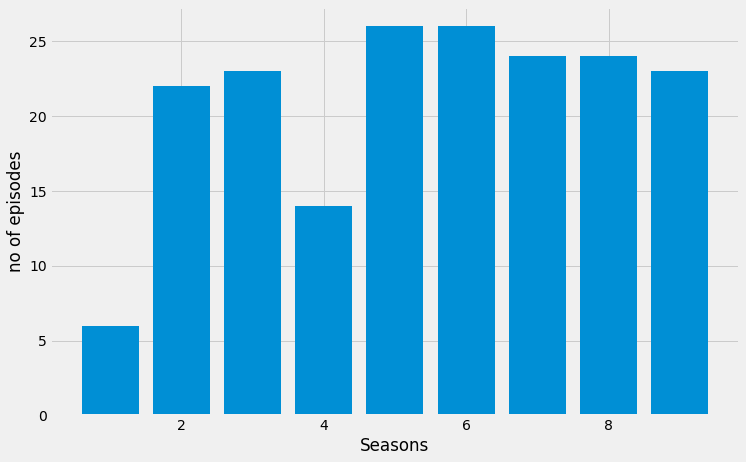

In [8]:
totalep = office_df.groupby('Season')[['EpisodeTitle']].count().reset_index()
a= totalep['Season']
b= totalep['EpisodeTitle']

plt.bar(a,b)
plt.xlabel('Seasons')
plt.ylabel('no of episodes')
plt.show()

### Creating two different dataframes on the basis of the HasGuest column value:

In [9]:

non_guest_df = office_df[office_df['HasGuest'] == False]
guest_df = office_df[office_df['HasGuest'] == True]

#### scatter chart Rating against Viewership:

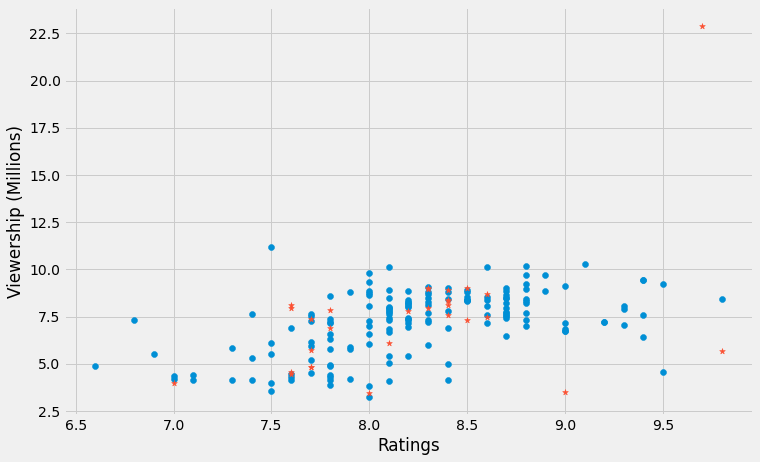

In [10]:
fig = plt.figure()
plt.style.use('fivethirtyeight')
plt.scatter(x= non_guest_df['Ratings'], 
            y= non_guest_df['Viewership']
            
           )

plt.scatter(x= guest_df['Ratings'], 
            y= guest_df['Viewership'],
            
            marker ="*"
           )


plt.xlabel("Ratings")
plt.ylabel("Viewership (Millions)")
plt.show( )



### creating a dataframe of top 10 highest rated episodes .

In [11]:
highest_rating = office_df.sort_values(by='Ratings', ascending=False)[['EpisodeTitle','Ratings','HasGuest']].iloc[:10,]

highest_rating.head(10)



,EpisodeTitle,Ratings,HasGuest
187,Finale,9.8,True
137,"Goodbye, Michael",9.8,False
77,Stress Relief,9.7,True
186,A.A.R.M.,9.5,False
59,Dinner Party,9.5,False
27,Casino Night,9.4,False
132,Threat Level Midnight,9.4,False
95,Niagara: Part 2,9.4,False
94,Niagara: Part 1,9.4,False
134,Garage Sale,9.3,False


### appending different colors  to the bars for episode names on the basis of presence or absence of Guest stars:
#### green for episodes with the guest
#### violet for non guest episodes.

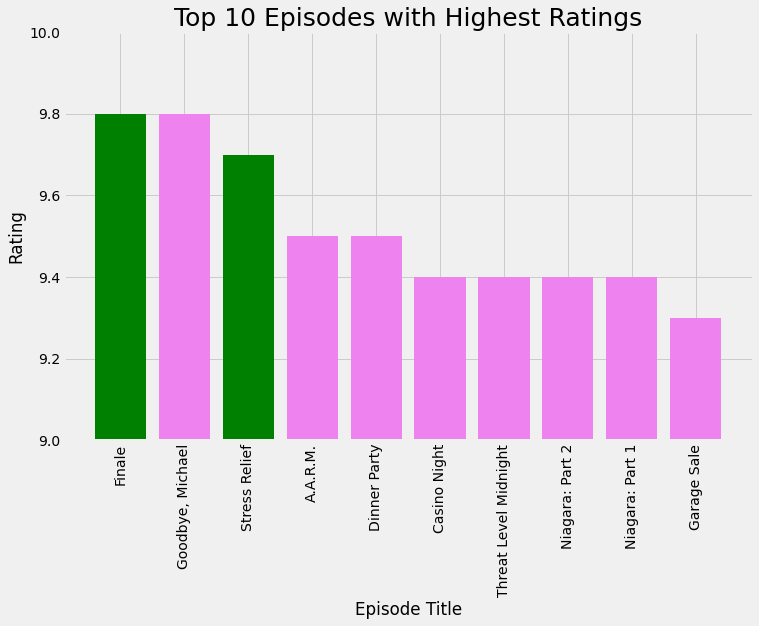

In [12]:
cols = []

for ind, row in highest_rating.iterrows():
    if row['HasGuest'] == False:
        cols.append('violet')
    else:
        cols.append('green')

        
plt.bar(highest_rating['EpisodeTitle'],highest_rating['Ratings'],color=cols)
plt.title('Top 10 Episodes with Highest Ratings', fontsize=25)
plt.xlabel('Episode Title')
plt.ylabel('Rating')
plt.ylim(9,10)
plt.xticks(rotation = 'vertical');
    

### bar plot showing top 10 highest viewed episodes:
    

In [13]:
highest_viewership = office_df.sort_values(by='Viewership', ascending=False)[['EpisodeTitle','Viewership','HasGuest']].iloc[:10,]

highest_viewership.head(10)

,EpisodeTitle,Viewership,HasGuest
77,Stress Relief,22.91,True
0,Pilot,11.20,False
17,The Injury,10.30,False
40,The Return,10.20,False
39,Traveling Salesmen,10.12,False
41,Ben Franklin,10.11,False
60,Chair Model,9.81,False
15,Christmas Party,9.70,False
51,Fun Run,9.70,False
95,Niagara: Part 2,9.42,False


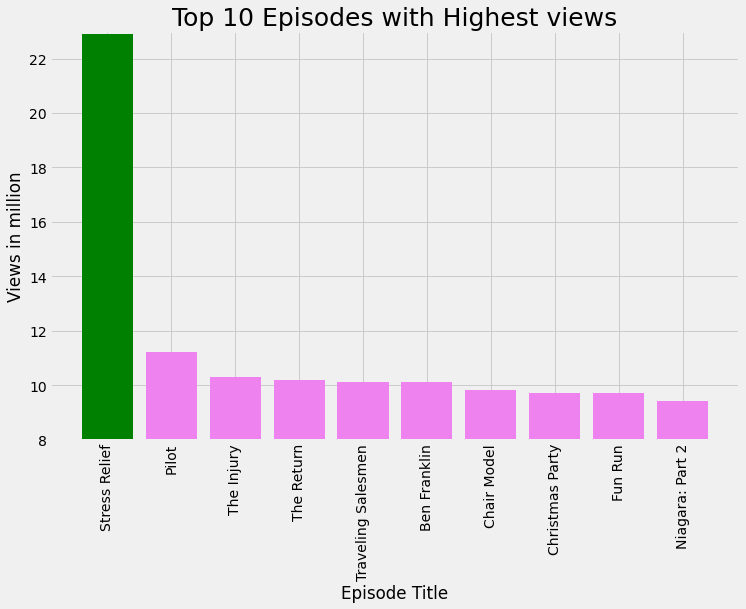

In [14]:
col = []

for ind, row in highest_viewership.iterrows():
    if row['HasGuest'] == False:
        col.append('violet')
    else:
        col.append('green')

        
plt.bar(highest_viewership['EpisodeTitle'],highest_viewership['Viewership'],color = col)
plt.title('Top 10 Episodes with Highest views', fontsize=25)
plt.xlabel('Episode Title')
plt.ylabel('Views in million')
plt.ylim(8,23)
plt.xticks(rotation = 'vertical');